In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv("StudentsPerformance.csv")

print("First 5 rows:")
print(data.head())

print("\nLast 5 rows:")
print(data.tail())

print("\nShape of dataset:", data.shape)

print("\nColumn names:")
print(data.columns)

print("\nData types:")
print(data.dtypes)

First 5 rows:
   gender parental level of education         lunch test preparation course  \
0  female           bachelor's degree      standard                    none   
1  female                some college      standard               completed   
2  female             master's degree      standard                    none   
3    male          associate's degree  free/reduced                    none   
4    male                some college      standard                    none   

   math score  reading score  writing score  
0          72             72             74  
1          69             90             88  
2          90             95             93  
3          47             57             44  
4          76             78             75  

Last 5 rows:
     gender parental level of education         lunch test preparation course  \
995  female             master's degree      standard               completed   
996    male                 high school  free/reduced      

In [8]:
print("Missing values in each column:")
print(data.isnull().sum())

print("\nDuplicate rows:", data.duplicated().sum())


data= data.drop_duplicates()

Missing values in each column:
gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Duplicate rows: 0


In [9]:
print(data.describe())

print("Average Math Score:", data["math score"].mean())
print("Highest Reading Score:", data["reading score"].max())
print("Lowest Writing Score:", data["writing score"].min())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
Average Math Score: 66.089
Highest Reading Score: 100
Lowest Writing Score: 10


In [10]:
data["average_score"] = (
    data["math score"] + 
    data["reading score"] + 
    data["writing score"]
) / 3

data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,bachelor's degree,standard,none,72,72,74,72.666667
1,female,some college,standard,completed,69,90,88,82.333333
2,female,master's degree,standard,none,90,95,93,92.666667
3,male,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,some college,standard,none,76,78,75,76.333333


In [11]:
def performance(score):
    if score >= 75:
        return "High"
    elif score >= 50:
        return "Medium"
    else:
        return "Low"

data["performance_category"] = data["average_score"].apply(performance)

data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,performance_category
0,female,bachelor's degree,standard,none,72,72,74,72.666667,Medium
1,female,some college,standard,completed,69,90,88,82.333333,High
2,female,master's degree,standard,none,90,95,93,92.666667,High
3,male,associate's degree,free/reduced,none,47,57,44,49.333333,Low
4,male,some college,standard,none,76,78,75,76.333333,High


In [15]:
mathsc = data["math score"].values

print("Mean:", np.mean(mathsc))
print("Median:", np.median(mathsc))
print("Standard Deviation:", np.std(mathsc))
print("Variance:", np.var(mathsc))
print("25th Percentile:", np.percentile(mathsc, 25))
print("75th Percentile:", np.percentile(mathsc, 75))


Mean: 66.089
Median: 66.0
Standard Deviation: 15.155496659628149
Variance: 229.68907899999996
25th Percentile: 57.0
75th Percentile: 77.0


In [16]:
print("Above 80 in Math:", np.sum(data["math score"] > 80))

print("Below 40 in Reading:", np.sum(data["reading score"] < 40))

print("Above 90 in all subjects:",
      np.sum((data["math score"] > 90) &
             (data["reading score"] > 90) &
             (data["writing score"] > 90)))

Above 80 in Math: 176
Below 40 in Reading: 26
Above 90 in all subjects: 23


In [17]:
minscore = data["math score"].min()
maxscore = data["math score"].max()

data["normalized_math"] = (data["math score"] - minscore) / (maxscore - minscore)

data.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,performance_category,normalized_math
0,female,bachelor's degree,standard,none,72,72,74,72.666667,Medium,0.72
1,female,some college,standard,completed,69,90,88,82.333333,High,0.69
2,female,master's degree,standard,none,90,95,93,92.666667,High,0.90
3,male,associate's degree,free/reduced,none,47,57,44,49.333333,Low,0.47
4,male,some college,standard,none,76,78,75,76.333333,High,0.76


In [19]:
print(data.groupby("gender")[["math score","reading score","writing score"]].mean())

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


In [20]:
print(data.groupby("lunch")[["math score","reading score","writing score"]].mean())

              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


In [21]:
print(data.groupby("test preparation course")[["math score","reading score","writing score"]].mean())

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


In [22]:
parentavg = data.groupby("parental level of education")["average_score"].mean()

print(parentavg.sort_values(ascending=False))

parental level of education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.569069
some college          68.476401
some high school      65.108007
high school           63.096939
Name: average_score, dtype: float64


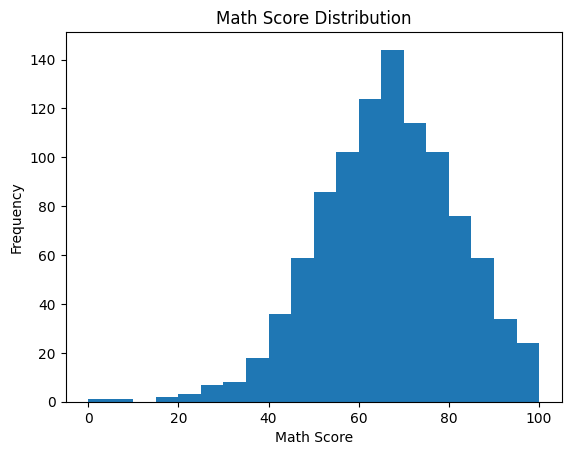

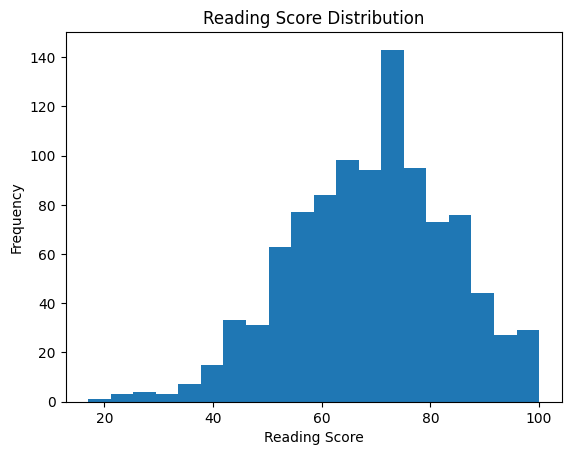

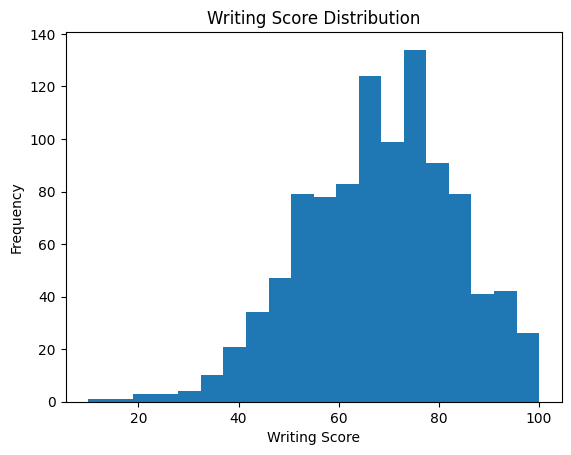

In [23]:
plt.hist(data["math score"], bins=20)
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

plt.hist(data["reading score"], bins=20)
plt.title("Reading Score Distribution")
plt.xlabel("Reading Score")
plt.ylabel("Frequency")
plt.show()

plt.hist(data["writing score"], bins=20)
plt.title("Writing Score Distribution")
plt.xlabel("Writing Score")
plt.ylabel("Frequency")
plt.show()


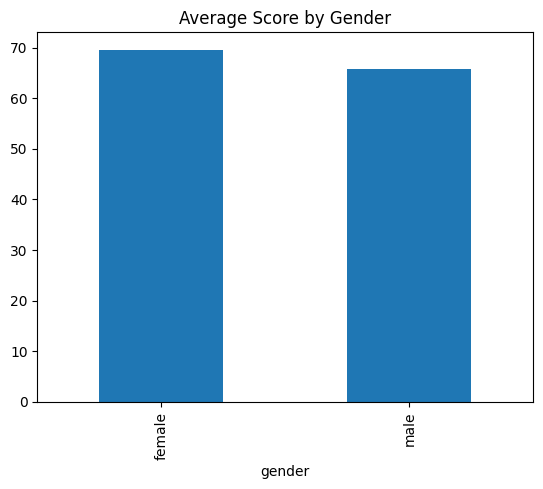

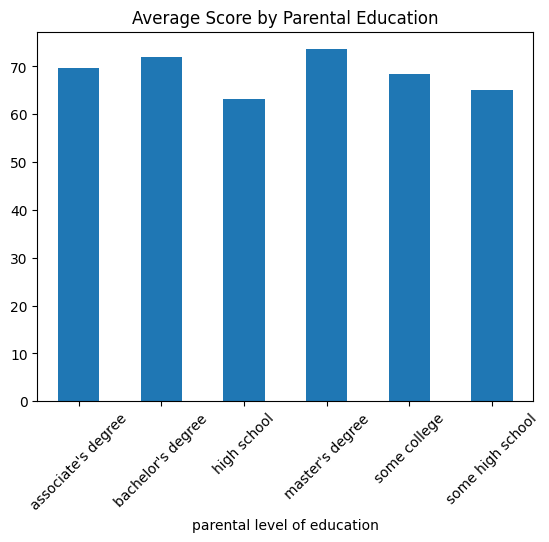

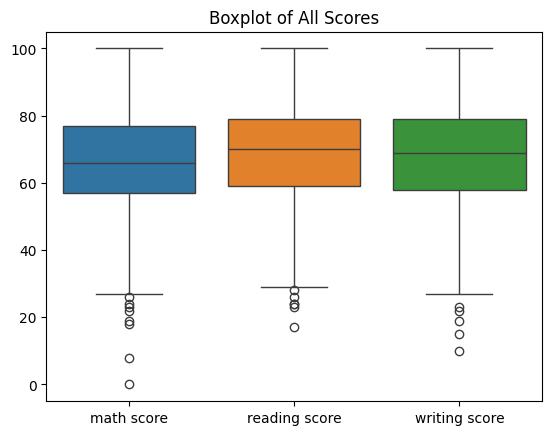

In [25]:
data.groupby("gender")["average_score"].mean().plot(kind="bar")
plt.title("Average Score by Gender")
plt.show()


parentavg.plot(kind="bar")
plt.title("Average Score by Parental Education")
plt.xticks(rotation=45)
plt.show()


sns.boxplot(data=data[["math score","reading score","writing score"]])
plt.title("Boxplot of All Scores")
plt.show()

                 math score  reading score  writing score  average_score  \
math score         1.000000       0.817580       0.802642       0.918746   
reading score      0.817580       1.000000       0.954598       0.970331   
writing score      0.802642       0.954598       1.000000       0.965667   
average_score      0.918746       0.970331       0.965667       1.000000   
normalized_math    1.000000       0.817580       0.802642       0.918746   

                 normalized_math  
math score              1.000000  
reading score           0.817580  
writing score           0.802642  
average_score           0.918746  
normalized_math         1.000000  


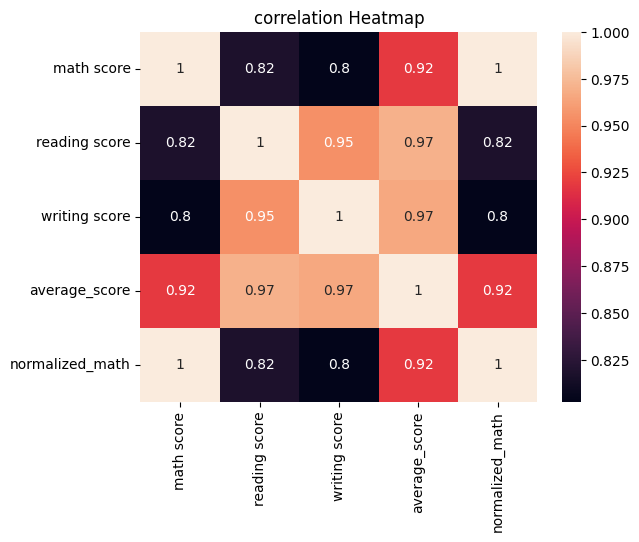

In [27]:
cr = data.corr(numeric_only=True)

print(cr)

sns.heatmap(cr, annot=True)
plt.title("correlation Heatmap")
plt.show()

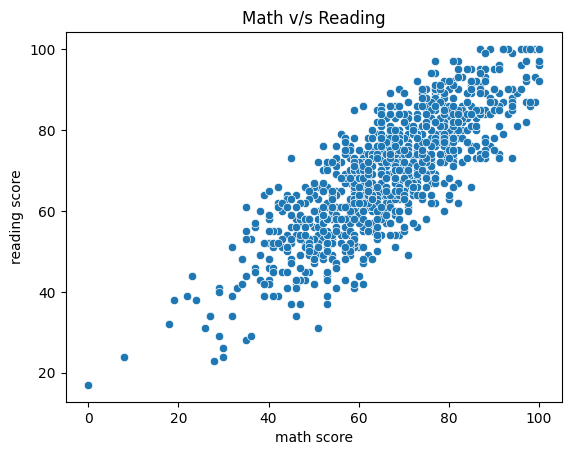

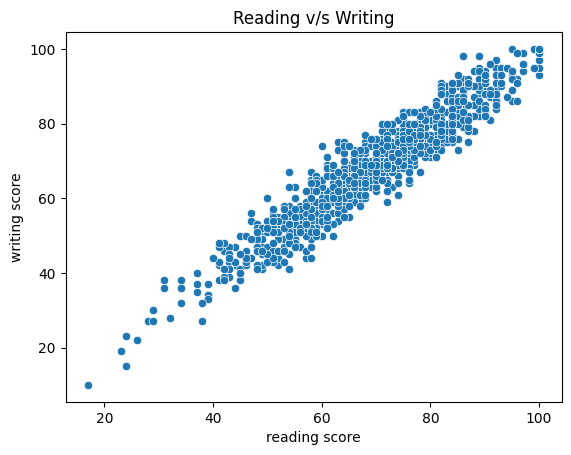

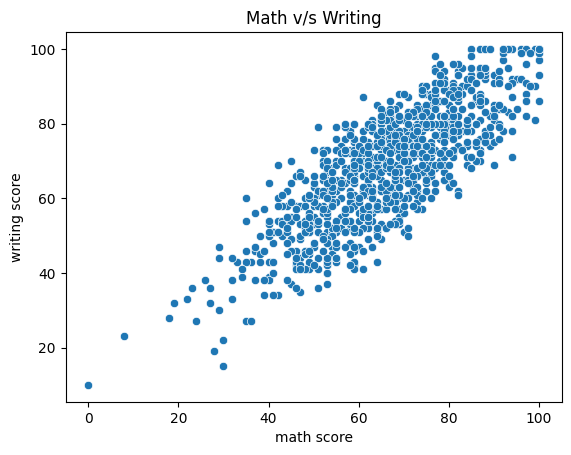

In [28]:
sns.scatterplot(x="math score", y="reading score", data=data)
plt.title("Math v/s Reading")
plt.show()

sns.scatterplot(x="reading score", y="writing score", data=data)
plt.title("Reading v/s Writing")
plt.show()

sns.scatterplot(x="math score", y="writing score", data=data)
plt.title("Math v/s Writing")
plt.show()
